Import all needed libraries here.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Here we're going to import the csv file and check out what it looks like initially.

In [2]:
legosets_df = pd.read_csv("Lego_Sets.csv")
print("Dimensions of the dataframe: ", legosets_df.shape[0], "x", legosets_df.shape[1])
print("Data types: \n", legosets_df.dtypes)
legosets_df

Dimensions of the dataframe:  19572 x 36
Data types: 
 Number               object
Theme                object
Subtheme             object
Year                  int64
Set name             object
Minifigs            float64
Pieces              float64
RRP (GBP)           float64
RRP (USD)           float64
RRP (CAD)           float64
RRP (EUR)           float64
EAN                 float64
UPC                 float64
Width               float64
Height              float64
Depth               float64
Weight              float64
Notes               float64
Qty owned             int64
Qty owned new         int64
Qty owned used        int64
Wanted              float64
Qty wanted            int64
Priority              int64
Unnamed: 24         float64
Unnamed: 25         float64
Unnamed: 26         float64
Unnamed: 27         float64
Unnamed: 28         float64
Unnamed: 29         float64
Unnamed: 30         float64
Unnamed: 31         float64
Value new (USD)     float64
Value used (USD)    f

,Number,Theme,Subtheme,Year,Set name,Minifigs,Pieces,RRP (GBP),RRP (USD),RRP (CAD),...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Value new (USD),Value used (USD),Launch date,Exit date
0,31203-1,Art,Miscellaneous,2021,World Map,NaN,11695.0,214.99,249.99,349.99,...,NaN,NaN,NaN,NaN,NaN,NaN,248.10,221.34,01/06/2021,31/12/2023
1,10307-1,Icons,Landmarks,2022,Eiffel Tower,NaN,10001.0,554.99,629.99,799.99,...,NaN,NaN,NaN,NaN,NaN,NaN,586.96,471.62,25/11/2022,31/12/2025
2,10294-1,Icons,Miscellaneous,2021,Titanic,NaN,9090.0,589.99,679.99,849.99,...,NaN,NaN,NaN,NaN,NaN,NaN,680.10,483.28,08/11/2021,31/12/2024
3,10276-1,Icons,Landmarks,2020,Colosseum,NaN,9036.0,474.99,549.99,649.99,...,NaN,NaN,NaN,NaN,NaN,NaN,500.27,419.50,27/11/2020,31/12/2023
4,75192-1,Star Wars,Ultimate Collector Series,2017,Millennium Falcon,8.0,7541.0,734.99,849.99,1049.99,...,NaN,NaN,NaN,NaN,NaN,NaN,649.12,585.45,01/10/2017,31/12/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19567,5005924-1,Gear,Bags,2019,Teen Minifigure Backpack,NaN,NaN,44.99,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19568,5005926-1,Gear,Bags,2019,Minifigure Drawstring Bag,NaN,NaN,9.99,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19569,5005920-1,Gear,Bags,2019,NINJAGO Belight Backpack,NaN,NaN,39.99,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19570,5005921-1,Gear,Stationery,2019,NINJAGO Pencil Roll,NaN,NaN,6.99,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Upon looking at this, we can automatically determine that there are many columns that we don't need.

We don't need the Number column as it will not be relevant to the data we are trying to analyze.

We'll also delete any columns involving price in other currencies aside from USD, as we only want to operate with one currency so as not to confuse any models or algorithms we implement (or ourselves!).

Weight, Height, and Depth can be deleted as they are likely not more factors into the price than the pieces are.

Qty owned and any associated columns can be deleted as they are not relevant to the data we are trying to analyze.

Any unnamed column can be deleted because we don't even know what they're there for.

Wanted, Qty wanted, and Priority can be deleted because they are not relevant to the data we are trying to analyze.

Similarly, Launch date and Exit date can be deleted because they will only confuse the data. We already have the Year column and that is the only time indicator we need for our dataset.

Lastly, we can delete the Value used, since we are looking only at the prices from when they were first released. This also means that we'll be deleting the Value new column, since that only lists prices for resale. (For example, a highly coveted set that came out in 2009 and was never opened might be sold for 1000 dollars even if it only cost 60 dollars when it came out.)

In [3]:
# List of columns to delete
columns_to_delete = ['Number', 'RRP (GBP)', 'RRP (CAD)', 'RRP (EUR)', 'EAN', 'UPC', 'Width', 'Height', 'Depth', 'Weight', 'Notes', 'Qty owned', 'Qty owned new', 'Qty owned used', 'Wanted', 'Qty wanted', 'Priority', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Value used (USD)', 'Launch date', 'Exit date', 'Value new (USD)']

# Drop the specified columns
legosets_df = legosets_df.drop(columns=columns_to_delete)

legosets_df = legosets_df.dropna(subset = ['Pieces'])

Now we still have some minifigs registered as NaN. In this case, a set with no minifigures should just be 0 – so let's impute all NaN values in the Minifigs column with 0.

In [4]:
legosets_df['Minifigs'] = legosets_df['Minifigs'].fillna(0)
legosets_df = legosets_df.dropna(subset = ['RRP (USD)'])
legosets_df

,Theme,Subtheme,Year,Set name,Minifigs,Pieces,RRP (USD)
0,Art,Miscellaneous,2021,World Map,0.0,11695.0,249.99
1,Icons,Landmarks,2022,Eiffel Tower,0.0,10001.0,629.99
2,Icons,Miscellaneous,2021,Titanic,0.0,9090.0,679.99
3,Icons,Landmarks,2020,Colosseum,0.0,9036.0,549.99
4,Star Wars,Ultimate Collector Series,2017,Millennium Falcon,8.0,7541.0,849.99
...,...,...,...,...,...,...,...
15233,Dacta,NaN,1979,Lego Educational Storage Cloth,0.0,1.0,10.00
15235,Dacta,NaN,1979,50 x 50 LEGO Gray Baseplate,0.0,1.0,10.00
15237,Mindstorms,NXT,2010,Mindstorms NXT IR Receiver,0.0,1.0,49.99
15240,Education,Mindstorms,2010,Energy Storage,0.0,1.0,16.95


Now we'll check for how many null-objects we have left in our dataframe.

In [5]:
legosets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9732 entries, 0 to 15241
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Theme      9732 non-null   object 
 1   Subtheme   7844 non-null   object 
 2   Year       9732 non-null   int64  
 3   Set name   9732 non-null   object 
 4   Minifigs   9732 non-null   float64
 5   Pieces     9732 non-null   float64
 6   RRP (USD)  9732 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 608.2+ KB


The only row with null values at this point is the "subtheme" column, which we don't need anyway. However, we're going to leave it in for now – just to double check that there are not some subthemes which don't apply to our goal of predicting prices for storebought LEGO sets.

Additionally, "Minifigs" and "Pieces" should be of type int, not type float, so we should convert those now.

In [6]:
# List of columns to convert to integer type
columns_to_convert = ['Minifigs', 'Pieces']

for column in columns_to_convert:
    legosets_df.loc[:, column] = legosets_df[column].astype(int)

legosets_df

,Theme,Subtheme,Year,Set name,Minifigs,Pieces,RRP (USD)
0,Art,Miscellaneous,2021,World Map,0,11695,249.99
1,Icons,Landmarks,2022,Eiffel Tower,0,10001,629.99
2,Icons,Miscellaneous,2021,Titanic,0,9090,679.99
3,Icons,Landmarks,2020,Colosseum,0,9036,549.99
4,Star Wars,Ultimate Collector Series,2017,Millennium Falcon,8,7541,849.99
...,...,...,...,...,...,...,...
15233,Dacta,NaN,1979,Lego Educational Storage Cloth,0,1,10.00
15235,Dacta,NaN,1979,50 x 50 LEGO Gray Baseplate,0,1,10.00
15237,Mindstorms,NXT,2010,Mindstorms NXT IR Receiver,0,1,49.99
15240,Education,Mindstorms,2010,Energy Storage,0,1,16.95


In [7]:
# Assuming 'RRP (USD)' is the column you want to check
zero_rrp_rows = legosets_df[legosets_df['RRP (USD)'] == 0]

# Display the rows where 'RRP (USD)' is 0
print("Rows where 'RRP (USD)' is 0:")
zero_rrp_rows

Rows where 'RRP (USD)' is 0:


,Theme,Subtheme,Year,Set name,Minifigs,Pieces,RRP (USD)
3342,Promotional,LEGO brand store opening set,2012,LEGO Brand Retail Store,0,280,0.0
5357,Promotional,LEGO brand store opening set,2010,{Art Deco Hotel},0,142,0.0
5397,Promotional,LEGO brand store opening set,2010,{Rattlesnake},0,140,0.0
5549,Promotional,LEGO brand store opening set,2010,{Transport Plane},0,133,0.0
5782,Promotional,LEGO brand store opening set,2009,{Lighthouse},0,121,0.0
...,...,...,...,...,...,...,...
14407,DC Comics Super Heroes,Justice League,2014,Martian Manhunter,1,4,0.0
14664,Promotional,LEGO brand store opening set,1997,{Bag of Bricks},0,3,0.0
14816,Legends of Chima,Promotional,2013,Lion tribe rip-cord and topper,0,2,0.0
14817,Promotional,LEGO brand store opening set,2013,"Lille, France, Exclusive Minifigure Pack",3,2,0.0


This is interesting – most RRP of 0 are in the Promotional theme or subtheme. This is likely because they were handed out as a free promotional item at some event. This got us thinking – how many sets are in the "Promotional" category?

In [8]:
#get all promotional sets
promotional_sets = legosets_df[(legosets_df['Subtheme'] == 'Promotional') | (legosets_df['Theme'] == 'Promotional')]
promotional_sets

,Theme,Subtheme,Year,Set name,Minifigs,Pieces,RRP (USD)
384,Promotional,Gift with Purchase,2012,Mini Modulars,0,1356,79.99
600,Promotional,LEGO House,2023,A Minifigure Tribute,0,1041,84.99
1702,Promotional,LEGO brand stores,2022,LEGO Brand Store,2,541,36.99
2079,Star Wars,Promotional,2020,Nebulon-B Frigate,0,459,39.99
2171,Promotional,LEGOLAND,2020,LEGOLAND NINJAGO World,4,440,39.99
...,...,...,...,...,...,...,...
14256,City,Promotional,2012,Chase McCain,1,4,0.00
14664,Promotional,LEGO brand store opening set,1997,{Bag of Bricks},0,3,0.00
14674,Star Wars,Promotional,2009,Collectable Display Set 2,3,2,49.99
14816,Legends of Chima,Promotional,2013,Lion tribe rip-cord and topper,0,2,0.00


Upon looking at the Promotional theme/subtheme, we can see that a large amount of them had to have their RRP imputed with their "Value New" data, making a lot of it unreliable. Additionally, we came to the conclusion that since these were sets that would be handed out at special promotional events, it does not align with our goal to make LEGO sets more affordable to the general public. These are sets that are made available exclusively for those "die-hard" fans of LEGO, and so it will not contribute to our goal of predicting and perfecting LEGO set prices.

Also, any sets that have yet to be released (i.e. those that are coming out in 2024) will be removed, as not all of them have prices yet.

In [9]:
# Create a boolean mask for rows where 'theme' is 'Promotional'
mask = legosets_df['Subtheme'] == 'Promotional'

# Use the mask to filter out rows with 'Promotional' theme
legosets_df = legosets_df[~mask]

mask = legosets_df['Year'] == 2024
legosets_df = legosets_df[~mask]

mask = legosets_df['Theme'] == 'Promotional'
legosets_df = legosets_df[~mask]

legosets_df = legosets_df.drop(columns='Subtheme')

legosets_df

,Theme,Year,Set name,Minifigs,Pieces,RRP (USD)
0,Art,2021,World Map,0,11695,249.99
1,Icons,2022,Eiffel Tower,0,10001,629.99
2,Icons,2021,Titanic,0,9090,679.99
3,Icons,2020,Colosseum,0,9036,549.99
4,Star Wars,2017,Millennium Falcon,8,7541,849.99
...,...,...,...,...,...,...
15233,Dacta,1979,Lego Educational Storage Cloth,0,1,10.00
15235,Dacta,1979,50 x 50 LEGO Gray Baseplate,0,1,10.00
15237,Mindstorms,2010,Mindstorms NXT IR Receiver,0,1,49.99
15240,Education,2010,Energy Storage,0,1,16.95


Now we've cleaned our data as it's been given to us, and it's time to add our own features to the dataframe!

# Theme Discovery and Column Addition

From the [brickset](https://brickset.com/browse/sets) website, we can check which specific LEGO set themes correlate to overall genres – for example, action/adventure, arts and crafts, basics, educational, etc. So, we'll be adding a column that correlates each set to their overarching genre.

In [10]:
## make lists based on genre

action_adventure_list = [
    'Agents',
    'Alpha Team',
    'Aqua Raiders',
    'Aquazone',
    'Atlantis',
    'Dino',
    'Dino 2010',
    'Dino Attack',
    'Dinosaurs',
    'Dreamzzz',
    'Elves',
    'Exo-Force',
    'Hidden Side',
    'Legends of Chima',
    'Monkie Kid',
    'Monster Fighters',
    'Nexo Knights',
    'Ninjago',
    'Power Miners',
    'Rock Raiders',
    'Space',
    'Time Cruisers',
    'Ultra Agents'
]
art_crafts_list = [
    'Art',
    'Dots'
]
basic_list = [
    'Basic',
    'Bricks and More',
    'Bulk Bricks',
    'Classic',
    'Freestyle',
    'Make and Create',
    'System',
    'Universal Building Set'
]
constraction_list = [
    'Ben 10: Alien Force',
    'Bionicle',
    'HERO Factory'
]
educational_list = [
    'Dacta',
    'Education',
    'Serious Play'
]
girls_list = [
    'Belville',
    'Clikits',
    'Scala'
]
historical_list = [
    'Adventurers',
    'Castle',
    "Pharaoh's Quest",
    'Pirates',
    'Vikings',
    'Western'
]
junior_list = [
    '4 Juniors',
    'Fabuland',
    'Jack Stone',
    'Juniors',
    'Mickey Mouse'
]
licensed_list = [
    'Animal Crossing',
    'Avatar',
    'Avatar The Last Airbender',
    'Batman',
    'Brick Sketches',
    'BrickHeadz',
    'Cars',
    'DC Comics Super Heroes',
    'DC Super Hero Girls',
    'Disney',
    "Gabby's Dollhouse",
    'Galidor',
    'Ghostbusters',
    'Harry Potter',
    'Indiana Jones',
    'Jurassic World',
    'Marvel Super Heroes',
    'Minecraft',
    'Minions: The Rise of Gru',
    'Overwatch',
    'Pirates of the Caribbean',
    'Prince of Persia',
    'Scooby-Doo',
    'Sonic the Hedgehog',
    'Speed Champions',
    'Spider-Man',
    'SpongeBob SquarePants',
    'Star Wars',
    'Stranger Things',
    'Super Mario',
    'Teenage Mutant Ninja Turtles',
    'The Angry Birds Movie',
    'The Hobbit',
    'The LEGO Batman Movie',
    'The LEGO Movie',
    'The LEGO Movie 2',
    'The LEGO Ninjago Movie',
    'The Lone Ranger',
    'The Lord of the Rings',
    'The Powerpuff Girls',
    'The Simpsons',
    'Toy Story',
    'Trolls World Tour',
    'Unikitty',
    'Vidiyo'
]
miscellaneous_list = [
    'Assorted',
    'Books',
    'Boost',
    'Collectable Minifigures',
    'Dimensions',
    'Factory',
    'FORMA',
    'Fusion',
    'Games',
    'Gear',
    'Ideas',
    'Life of George',
    'Master Builder Academy',
    'Miscellaneous',
    'Mixels',
    'Seasonal',
    'Service Packs',
    'Xtra'
]
model_making_list = [
    'Advanced models',
    'Architecture',
    'Bricklink',
    'Creator',
    'Creator Expert',
    'Icons',
    'Model Team'
]
modern_day_list = [
    'Boats',
    'City',
    'Discovery',
    'Friends',
    'Sports',
    'Studios',
    'Town',
    'Trains',
    'World City'
]
other_list = [
    'LEGO Games',
    'LEGO Universe'
]
preschool_list = [
    'Action Wheelers',
    'Baby',
    'Duplo',
    'Explore',
    'PreSchool',
    'Primo',
    'Quatro'
]
racing_list = [
    'Island Xtreme Stunts',
    'Racers',
    'World Racers'
]
technical_list = [
    'Mindstorms',
    'Power Functions',
    'Powered Up',
    'Spybotics',
    'Technic',
    'Znap'
]
vintage_list = [
    'Building Set with People',
    'Hobby Set',
    'Homemaker',
    'LEGOLAND',
    'Legoland',
    'Minitalia',
    'Samsonite'
]

In [11]:
# create the genre column
for index, row in legosets_df.iterrows():
    if row['Theme'] in action_adventure_list:
        legosets_df.loc[index, 'Genre'] = 'Action/Adventure'
       
    elif row['Theme'] in art_crafts_list:
        legosets_df.loc[index, 'Genre'] = 'Arts'
       
    elif row['Theme'] in basic_list:
        legosets_df.loc[index, 'Genre'] = 'Basic'
       
    elif row['Theme'] in constraction_list:
        legosets_df.loc[index, 'Genre'] = 'Constraction'
       
    elif row['Theme'] in educational_list:
        legosets_df.loc[index, 'Genre'] = 'Educational'
       
    elif row['Theme'] in girls_list:
        legosets_df.loc[index, 'Genre'] = 'Girls'
       
    elif row['Theme'] in historical_list:
        legosets_df.loc[index, 'Genre'] = 'Historical'
       
    elif row['Theme'] in junior_list:
        legosets_df.loc[index, 'Genre'] = 'Junior'
       
    elif row['Theme'] in licensed_list:
        legosets_df.loc[index, 'Genre'] = 'Licensed'
       
    elif row['Theme'] in miscellaneous_list:
        legosets_df.loc[index, 'Genre'] = 'Miscellaneous'
       
    elif row['Theme'] in model_making_list:
        legosets_df.loc[index, 'Genre'] = 'Model Making'
       
    elif row['Theme'] in modern_day_list:
        legosets_df.loc[index, 'Genre'] = 'Modern Day'
   
    elif row['Theme'] in other_list:
        legosets_df.loc[index, 'Genre'] = 'Other'
       
    elif row['Theme'] in preschool_list:
        legosets_df.loc[index, 'Genre'] = 'Preschool'
       
    elif row['Theme'] in racing_list:
        legosets_df.loc[index, 'Genre'] = 'Racing'
       
    elif row['Theme'] in technical_list:
        legosets_df.loc[index, 'Genre'] = 'Technical'
   
    elif row['Theme'] in vintage_list:
        legosets_df.loc[index, 'Genre'] = 'Vintage'
        
legosets_df

,Theme,Year,Set name,Minifigs,Pieces,RRP (USD),Genre
0,Art,2021,World Map,0,11695,249.99,Arts
1,Icons,2022,Eiffel Tower,0,10001,629.99,Model Making
2,Icons,2021,Titanic,0,9090,679.99,Model Making
3,Icons,2020,Colosseum,0,9036,549.99,Model Making
4,Star Wars,2017,Millennium Falcon,8,7541,849.99,Licensed
...,...,...,...,...,...,...,...
15233,Dacta,1979,Lego Educational Storage Cloth,0,1,10.00,Educational
15235,Dacta,1979,50 x 50 LEGO Gray Baseplate,0,1,10.00,Educational
15237,Mindstorms,2010,Mindstorms NXT IR Receiver,0,1,49.99,Technical
15240,Education,2010,Energy Storage,0,1,16.95,Educational


Additionally, we'll be adding a column based on what category the set fits into as an IP. For example, there are many sets based on TV shows, movies, and video games. For any sets that don't fit into those IP categories, it's likely that they are LEGO originals – that is, themed LEGO sets that are completely unique. Anything that doesn't fit into those arbitrary themes will go into the 'Other' category.

In [12]:
## make lists based on IPs (movie, show, game, LEGO Original, other)

tv_show_list = {'Ben 10: Alien Force', 'Mickey Mouse',
                'Avatar The Last Airbender', 'Scooby-Doo',
                'SpongeBob SquarePants', 'Stranger Things',
                'Teenage Mutant Ninja Turtles', 'The Powerpuff Girls'
                'The Simpsons', 'Ninjago', 'Legends of Chima', 'Galidor', "Gabby's Dollhouse",
                'Unikitty', 'Monkie Kid', 'Hidden Side', 'Dreamzzz',
                'Nexo Knights', 'HERO Factory', 'Mixels'}
movie_list = {'Avatar', 'Batman', 'Cars',
              'DC Comics Super Heroes', 'DC Super Hero Girls',
              'Disney', 'Ghostbusters', 'Harry Potter',
              'Indiana Jones', 'Jurassic World',
              'Marvel Super Heroes', 'Minions: The Rise of Gru', 'Pirates of the Caribbean',
              'Spider-Man', 'Star Wars', 'The Angry Birds Movie',
              'The Hobbit', 'The LEGO Batman Movie', 'The LEGO Movie',
              'The LEGO Movie 2', 'The LEGO Ninjago Movie', 'The Lone Ranger',
              'The Lord of the Rings', 'Toy Story', 'Trolls World Tour'}

video_games_list = {'Animal Crossing', 'Minecraft', 'Overwatch', 'Sonic the Hedgehog',
                    'Prince of Persia', 'Super Mario', 'Dimensions', 'Rock Raiders', 'LEGO Universe'}

lego_originals_list = {'Agents', 'Alpha Team', 'Aqua Raiders', 'Aquazone', 'Atlantis',
                       'Dino', 'Dino 2010', 'Dino Attack',
                       'Dinosaurs', 'Elves', 'Exo-Force', 'Monster Fighters',
                       'Power Miners', 'Space', 'Time Cruisers', 'Ultra Agents', 'Bionicle',
                       'Belville', 'Clikits', 'Scala', 'Adventurers', 'Castle',
                       "Pharaoh's Quest", 'Pirates', 'Vikings', 'Western',
                       'Fabuland', 'Jack Stone', 'Vidiyo', 'Life of George',
                       'City', 'Friends', 'Duplo', 'Island Xtreme Stunts', 'Mindstorms', 'Technic', 'Znap'}

other_list = {'Art', 'Dots', 'Basic', 'Bricks and More', 'Bulk Bricks', 'Classic', 'Freestyle',
              'Make and Create', 'System', 'Universal Building Set',
              'Dacta', 'Education', 'Serious Play', '4 Juniors',
              'Juniors', 'Brick Sketches', 'BrickHeadz', 'Assorted', 'Books',
              'Boost', 'Collectable Minifigures', 'Factory', 'FORMA',
              'Fusion', 'Games', 'Gear', 'Ideas', 'Master Builder Academy', 'Miscallaneous',
              'Seasonal', 'Service Packs', 'Xtra', 'Advanced Models',
              'Architecture', 'Bricklink', 'Creator',
              'Creator Experts', 'Icons', 'Model Team', 'Boats', 'Discovery',
              'Sports', 'Studios', 'Town', 'Trains', 'World City', 'LEGO Games',
              'Action Wheelers', 'Baby', 'Explore', 'PreSchool', 'Primo', 'Quatro',
              'Racers', 'World Racers', 'Power Functions', 'Powered Up', 'Spybotics', 
              'Building Set with People', 'Hobby Set', 'Homemaker', 'LEGOLAND', 'Legoland',
              'Minitalia', 'Samsonite'}

In [13]:
# Function to categorize themes
def categorize_ip_theme(theme):
    if theme in tv_show_list:
        return 'TV Show'
    elif theme in movie_list:
        return 'Movie'
    elif theme in video_games_list:
        return 'Video Game'
    elif theme in lego_originals_list:
        return 'LEGO Original'
    elif theme in other_list:
        return 'Other'
    else:
        return 'Uncategorized'


# Add a new column 'Category' based on the 'theme' column
legosets_df['IP Category'] = legosets_df['Theme'].apply(categorize_ip_theme)
legosets_df

,Theme,Year,Set name,Minifigs,Pieces,RRP (USD),Genre,IP Category
0,Art,2021,World Map,0,11695,249.99,Arts,Other
1,Icons,2022,Eiffel Tower,0,10001,629.99,Model Making,Other
2,Icons,2021,Titanic,0,9090,679.99,Model Making,Other
3,Icons,2020,Colosseum,0,9036,549.99,Model Making,Other
4,Star Wars,2017,Millennium Falcon,8,7541,849.99,Licensed,Movie
...,...,...,...,...,...,...,...,...
15233,Dacta,1979,Lego Educational Storage Cloth,0,1,10.00,Educational,Other
15235,Dacta,1979,50 x 50 LEGO Gray Baseplate,0,1,10.00,Educational,Other
15237,Mindstorms,2010,Mindstorms NXT IR Receiver,0,1,49.99,Technical,LEGO Original
15240,Education,2010,Energy Storage,0,1,16.95,Educational,Other


The last column we'll be addding is the rates of inflation for each year correlating to what's in our dataframe. To do this, we'll map each year to their corresponding inflation rate (according to MacroTrends and Forbes, as cited in our poster) in a dictionary.

In [14]:
inflation_dictionary = {1949: 0, 1950: 0, 1951: 0, 1952: 0,
                        1953: 0, 1954: 0, 1955: 0, 1956: 0,
                        1957: 0, 1958: 0, 1959: 0, 1960: 1.46,
                        1961: 1.07, 1962: 1.2, 1963: 1.24, 1964: 1.28,
                        1965: 1.59, 1966: 3.02, 1967: 2.77, 1968: 4.27,
                        1969: 5.46, 1970: 5.84, 1971: 4.29, 1972: 3.27,
                        1973: 6.18, 1974: 11.05, 1975: 9.14, 1976: 5.74,
                        1977: 6.5, 1978: 7.63, 1979: 11.25, 1980: 13.55,
                        1981: 10.33, 1982: 6.13, 1983: 3.21, 1984: 4.3,
                        1985: 3.55, 1986: 1.9, 1987: 3.66, 1988: 4.08,
                        1989: 4.83, 1990: 5.4, 1991: 4.24, 1992: 3.03,
                        1993: 2.95, 1994: 2.61, 1995: 2.81, 1996: 2.93,
                        1997: 2.34, 1998: 1.55, 1999: 2.19, 2000: 3.38,
                        2001: 2.83, 2002: 1.59, 2003: 2.27, 2004: 2.68,
                        2005: 3.39, 2006: 3.23, 2007: 2.85, 2008: 3.84,
                        2009: -0.36, 2010: 1.64, 2011: 3.16, 2012: 2.07,
                        2013: 1.46, 2014: 1.62, 2015: 0.12, 2016: 1.26,
                        2017: 2.13, 2018: 2.44, 2019: 1.81, 2020: 1.23,
                        2021: 4.7, 2022: 8, 2023: 4.6}

# Map the inflation rates based on the 'Year' column
legosets_df['Yearly Inflation Rate'] = legosets_df['Year'].map(inflation_dictionary)

legosets_df

,Theme,Year,Set name,Minifigs,Pieces,RRP (USD),Genre,IP Category,Yearly Inflation Rate
0,Art,2021,World Map,0,11695,249.99,Arts,Other,4.70
1,Icons,2022,Eiffel Tower,0,10001,629.99,Model Making,Other,8.00
2,Icons,2021,Titanic,0,9090,679.99,Model Making,Other,4.70
3,Icons,2020,Colosseum,0,9036,549.99,Model Making,Other,1.23
4,Star Wars,2017,Millennium Falcon,8,7541,849.99,Licensed,Movie,2.13
...,...,...,...,...,...,...,...,...,...
15233,Dacta,1979,Lego Educational Storage Cloth,0,1,10.00,Educational,Other,11.25
15235,Dacta,1979,50 x 50 LEGO Gray Baseplate,0,1,10.00,Educational,Other,11.25
15237,Mindstorms,2010,Mindstorms NXT IR Receiver,0,1,49.99,Technical,LEGO Original,1.64
15240,Education,2010,Energy Storage,0,1,16.95,Educational,Other,1.64


In [15]:
legosets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 0 to 15241
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Theme                  9516 non-null   object 
 1   Year                   9516 non-null   int64  
 2   Set name               9516 non-null   object 
 3   Minifigs               9516 non-null   int64  
 4   Pieces                 9516 non-null   int64  
 5   RRP (USD)              9516 non-null   float64
 6   Genre                  9516 non-null   object 
 7   IP Category            9516 non-null   object 
 8   Yearly Inflation Rate  9516 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 1001.5+ KB


Here, we're just checking to make sure that we don't have any null values. Looks good!

In [16]:
legosets_df

,Theme,Year,Set name,Minifigs,Pieces,RRP (USD),Genre,IP Category,Yearly Inflation Rate
0,Art,2021,World Map,0,11695,249.99,Arts,Other,4.70
1,Icons,2022,Eiffel Tower,0,10001,629.99,Model Making,Other,8.00
2,Icons,2021,Titanic,0,9090,679.99,Model Making,Other,4.70
3,Icons,2020,Colosseum,0,9036,549.99,Model Making,Other,1.23
4,Star Wars,2017,Millennium Falcon,8,7541,849.99,Licensed,Movie,2.13
...,...,...,...,...,...,...,...,...,...
15233,Dacta,1979,Lego Educational Storage Cloth,0,1,10.00,Educational,Other,11.25
15235,Dacta,1979,50 x 50 LEGO Gray Baseplate,0,1,10.00,Educational,Other,11.25
15237,Mindstorms,2010,Mindstorms NXT IR Receiver,0,1,49.99,Technical,LEGO Original,1.64
15240,Education,2010,Energy Storage,0,1,16.95,Educational,Other,1.64


And this is our final cleaned data frame!

To finalize our EDA, let's go over the data types:

Theme, Genre, Set name, and IP Category are categorical. In fact, they are all nominal, as there is no way to rank any of them.

Year, Minifigs, Pieces, RRP, and Yearly Inflation Rate are numerical.

Please note: the Set name column will not be used in our ML models. It is only there for our own reference so we can tell which sets each row represents.

# Model Training

## Linear Regression Model

While initially we thought using k-NN would be best, upon testing it, we realized that a Linear Regression model would work better since overall this data is continuous – the price points are relatively arbitrary. So, below is our code for testing and training the linear regression model and the subsequent graph which shows the predicted price points and actual price points.

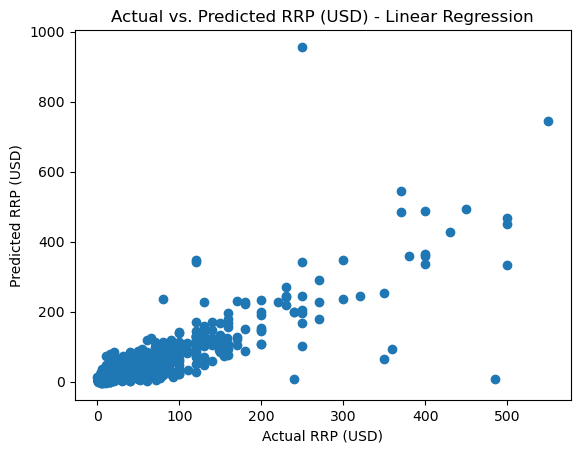

Best Hyperparameters: {'alpha': 100}
Best score: -652.92
Best R-squared: 0.7
Best Mean Squared Error: 924.61


In [17]:
# encode any categorical data
label_encoder = LabelEncoder()
legosets_df['Genre_encoded'] = label_encoder.fit_transform(legosets_df['Genre'])
legosets_df['IP Category_encoded'] = label_encoder.fit_transform(legosets_df['IP Category'])
legosets_df['Theme_encoded'] = label_encoder.fit_transform(legosets_df['Theme'])

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Prepare the data
X = legosets_df[['Year', 'Minifigs', 'Pieces', 'Genre_encoded', 'IP Category_encoded', 'Theme_encoded', 'Yearly Inflation Rate']]
y = legosets_df['RRP (USD)']

# Set the testing and training for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Ridge regression model
ridge_model = Ridge()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 1, 10, 100]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_ridge_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best = best_ridge_model.predict(X_test)

# Visualize the data and predictions
plt.scatter(y_test, y_pred_best)
plt.title('Actual vs. Predicted RRP (USD) - Linear Regression')
plt.xlabel('Actual RRP (USD)')
plt.ylabel('Predicted RRP (USD)')
plt.show()

# Calculate mse and r squared values for the best model
mse_best = mean_squared_error(y_test, y_pred_best).round(2)
r2_best = r2_score(y_test, y_pred_best).round(2)

print("Best Hyperparameters:", best_params)
print(f"Best score: {grid_search.best_score_.round(2)}")
print(f'Best R-squared: {r2_best}')
print(f'Best Mean Squared Error: {mse_best}')


## SVR Model

While initially we thought using SVM would be best, upon testing it, we realized that an SVR model would work better since overall this data is continuous – the price points are relatively arbitrary. So, below is our code for testing and training the SVR model and a subsequent graph which shows the predicted price points and actual price points.

In [18]:
# Create X and Y sets
X = legosets_df[['Year', 'Minifigs', 'Pieces', 'Genre', 'Theme', 'IP Category', 'Theme_encoded', 'Yearly Inflation Rate', 'Genre_encoded', 'IP Category_encoded']]
Y = legosets_df['RRP (USD)']

#split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state = 42)

#scale the training data
scaler = StandardScaler()
scaler.fit(X_train[['Year', 'Minifigs', 'Pieces', 'Yearly Inflation Rate', 'Genre_encoded', 'IP Category_encoded', 'Theme_encoded']])

# scale the training data and drop categorical columns
X_train[['Year', 'Minifigs', 'Pieces', 'Yearly Inflation Rate', 'Genre_encoded', 'IP Category_encoded', 'Theme_encoded']] = scaler.transform(X_train[['Year', 'Minifigs', 'Pieces', 'Yearly Inflation Rate', 'Genre_encoded', 'IP Category_encoded', 'Theme_encoded']])
X_train = X_train.drop(['Genre', 'IP Category', 'Theme'], axis=1)

In [19]:
#Scale the test data and drop categorical columns
X_test[['Year', 'Minifigs', 'Pieces', 'Yearly Inflation Rate', 'Genre_encoded', 'IP Category_encoded', 'Theme_encoded']] = scaler.transform(X_test[['Year', 'Minifigs', 'Pieces', 'Yearly Inflation Rate', 'Genre_encoded', 'IP Category_encoded', 'Theme_encoded']])
X_test = X_test.drop(['Genre', 'IP Category', 'Theme'], axis=1)

In [20]:
# create and fit the model, then make predictions
svr = SVR(kernel='linear', C=10, gamma=0.1)
svr.fit(X_train, Y_train)
predictions = svr.predict(X_test)

In [21]:
# calculate the mse and r-squared values
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

In [22]:
# set paramaters/hyperparameterization
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

# instantiate grid search
svr_grid = GridSearchCV(SVR(), param_grid, cv=5)
svr_grid.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf']})

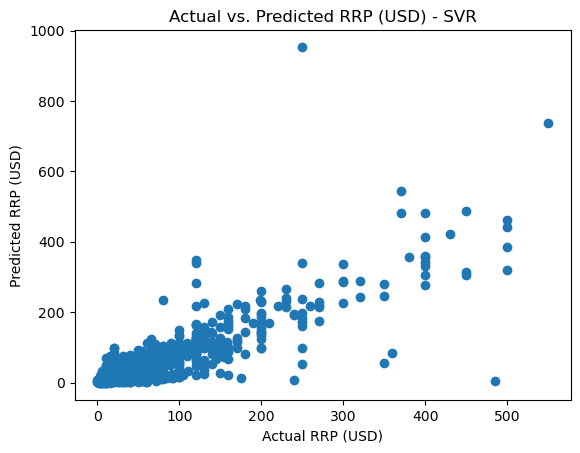

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best score: 0.75
Best R-squared: 0.74
Best Mean Squared Error: 797.97


In [23]:
# Visualize the data and predictions
plt.scatter(Y_test, predictions)
plt.xlabel("Actual RRP (USD)")
plt.ylabel("Predicted RRP (USD)")
plt.title("Actual vs. Predicted RRP (USD) - SVR")
plt.show()

# print results
print(f"Best Hyperparameters: {svr_grid.best_params_}")
print(f"Best score: {svr_grid.best_score_.round(2)}")
print(f"Best R-squared: {r2.round(2)}")
print(f"Best Mean Squared Error: {mse.round(2)}")

## RFR Model

Below is our code for testing and training the RFR model and a subsequent graph which shows the predicted price points and actual price points. It gave us the best R-squared value out of our three models (0.84), so we will be using this model for the rest of our project!

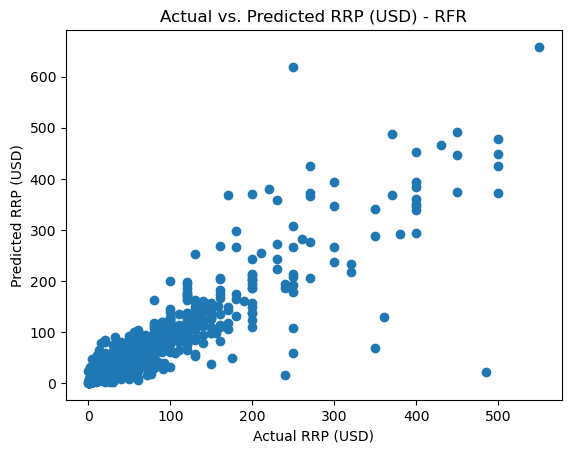

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: -511.99
Best R-squared: 0.84
Best Mean Squared Error: 498.93


In [24]:
from sklearn.model_selection import GridSearchCV

# Create the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_rf_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_best = best_rf_model.predict(X_test)

# Visualize the model
plt.scatter(Y_test, y_pred_best)
plt.xlabel("Actual RRP (USD)")
plt.ylabel("Predicted RRP (USD)")
plt.title("Actual vs. Predicted RRP (USD) - RFR")
plt.show()

# Calculate mse and r squared values for the best model
mse_best = mean_squared_error(Y_test, y_pred_best)
r2_best = r2_score(Y_test, y_pred_best)

print("Best Hyperparameters:", best_params)
print(f"Best score: {grid_search.best_score_.round(2)}")
print(f"Best R-squared: {r2_best.round(2)}")
print(f"Best Mean Squared Error: {mse_best.round(2)}")